In [1]:
#Downloading dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d brsdincer/asteroid-classification-for-hazardous-prediction

asteroid-classification-for-hazardous-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
#Unzipping the dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/asteroid-classification-for-hazardous-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Data Cleaning

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('/content/Asteroid_Updated.csv')

<ipython-input-4-b269467dee54>:1: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/Asteroid_Updated.csv')


In [5]:
df

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


In [6]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

# Columns according to the dataset:
a- semi-major axis(au)

e- eccentricity

i- Inclination with respect to x-y ecliptic plane(deg)

om- Longitude of the ascending node

w- argument of perihelion

q- argument of perihelion

ad- aphelion distance(au)

per-y- Orbital period(YEARS)

data_arc- data arc range (it is not important to calculate)

condition_code- condition code

n_obs_used- (it is not important to calculate)

H- Absolute Magnitude parameter

neo- Near Earth Object / N or Y

pha- Physically Hazardous Asteroid - N or Y

diameter

extent

albedo- albedo value

rot_per- rotation period


BV- Color

UB- Color

spec_B- Class Type Speci.

spec_T- Class Type General


moid- Earth Minimum orbit Intersection Distance(au)

class- Class

n- Mean motion(deg/d)

per- orbital Period(d)

ma- Mean anomaly(deg)



In [7]:
#analyzing datatypes of columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

22

In [8]:
#missing values
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

IR                839713
GM                839700
extent            839696
G                 839595
UB                838735
spec_T            838734
BV                838693
spec_B            838048
rot_per           820918
name              817747
albedo            703305
diameter          702078
pha                16442
moid               16442
data_arc           15474
H                   2689
condition_code       867
ma                     8
ad                     6
neo                    6
per                    6
a                      2
n                      2
per_y                  1
n_obs_used             0
w                      0
om                     0
i                      0
e                      0
class                  0
q                      0
dtype: int64

In [9]:
#Dropping the columns with too many missing values
columns_to_drop = ['IR', 'GM', 'extent', 'G', 'UB', 'spec_T', 'BV', 'spec_B', 'rot_per', 'name', 'albedo', 'diameter','condition_code']
df=df.drop(columns=columns_to_drop)

In [10]:
df=df.dropna(subset=['pha','H','data_arc','ma','ad','neo','per','n','a','per_y'])

In [11]:
#missing values
missing_percentages = df.isna().sum().sort_values(ascending=False)
missing_percentages

a             0
e             0
per           0
n             0
class         0
moid          0
pha           0
neo           0
H             0
n_obs_used    0
data_arc      0
per_y         0
ad            0
q             0
w             0
om            0
i             0
ma            0
dtype: int64

In [12]:
df['neo'] = df['neo'].replace({'Y': 1, 'N': 0})
df['pha'] = df['pha'].replace({'Y': 1, 'N': 0})

In [13]:
df['class'].unique()

array(['MBA', 'OMB', 'MCA', 'AMO', 'IMB', 'TJN', 'CEN', 'APO', 'ATE',
       'AST', 'TNO', 'IEO'], dtype=object)

In [14]:
class_mapping = {
    'MBA': 0,
    'OMB': 1,
    'MCA': 2,
    'AMO': 3,
    'IMB': 4,
    'TJN': 5,
    'CEN': 6,
    'APO': 7,
    'ATE': 8,
    'AST': 9,
    'TNO': 10,
    'IEO': 11
}
df['class'] = df['class'].replace(class_mapping)

In [15]:
df.info

<bound method DataFrame.info of                a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   
...          ...       ...        ...         ...         ...       ...   
839709  2.812945  0.664688   4.695700  183.310012  234.618352  0.943214   
839710  2.645238  0.259376  12.574937    1.620020  339.568072  1.959126   
839711  2.373137  0.202053   0.732484  176.499082  198.026527  1.893638   
839712  2.260404  0.258348   9.661947  204.512448  148.496988  1.676433   
839713  2.546442  0.287672   5.356238   70.709555  273.483265  1.813901   

              ad     per_y  data_arc  n_obs_used       H  neo  pha 

In [16]:
X = df.drop('pha', axis=1)
y = df['pha']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=99)

# Classification model to predict whether an asteroid is hazardous

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [19]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
#model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [21]:
#Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=64)

Epoch 1/10
10253/10253 [==============================] - 58s 5ms/step - loss: 0.0072 - accuracy: 0.9973
Epoch 2/10
10253/10253 [==============================] - 56s 5ms/step - loss: 0.0056 - accuracy: 0.9976
Epoch 3/10
10253/10253 [==============================] - 54s 5ms/step - loss: 0.0055 - accuracy: 0.9976
Epoch 4/10
10253/10253 [==============================] - 55s 5ms/step - loss: 0.0054 - accuracy: 0.9976
Epoch 5/10
10253/10253 [==============================] - 55s 5ms/step - loss: 0.0051 - accuracy: 0.9977
Epoch 6/10
10253/10253 [==============================] - 55s 5ms/step - loss: 0.0053 - accuracy: 0.9978
Epoch 7/10
10253/10253 [==============================] - 59s 6ms/step - loss: 0.0051 - accuracy: 0.9978
Epoch 8/10
10253/10253 [==============================] - 54s 5ms/step - loss: 0.0051 - accuracy: 0.9978
Epoch 9/10
10253/10253 [==============================] - 54s 5ms/step - loss: 0.0052 - accuracy: 0.9978
Epoch 10/10
10253/10253 [==============================

In [25]:
# Evaluating
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

5127/5127 [==============================] - 18s 3ms/step


In [29]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Accuracy: 1.00
Precision: 0.80
Recall: 0.27
F1 Score: 0.40
ROC AUC Score: 0.63


In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

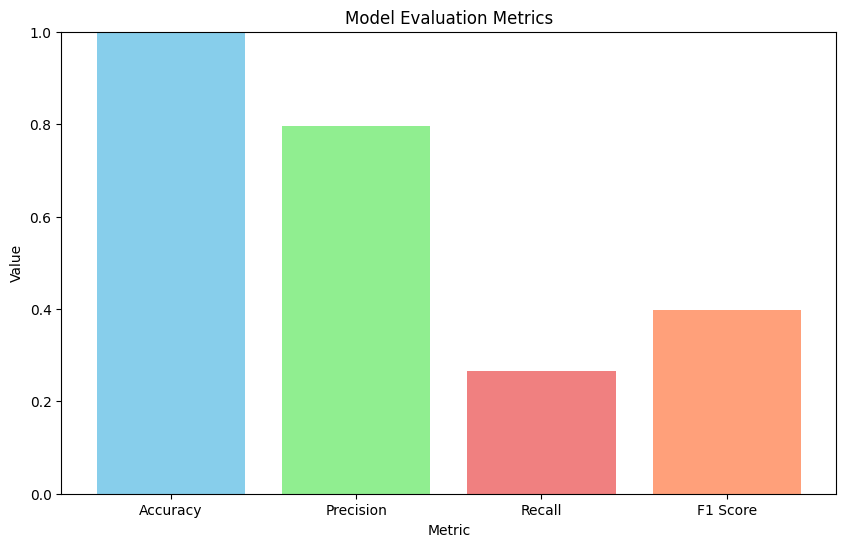

In [33]:
# Ploting accuracy, precision, recall, and F1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon'])
plt.title('Model Evaluation Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.show()

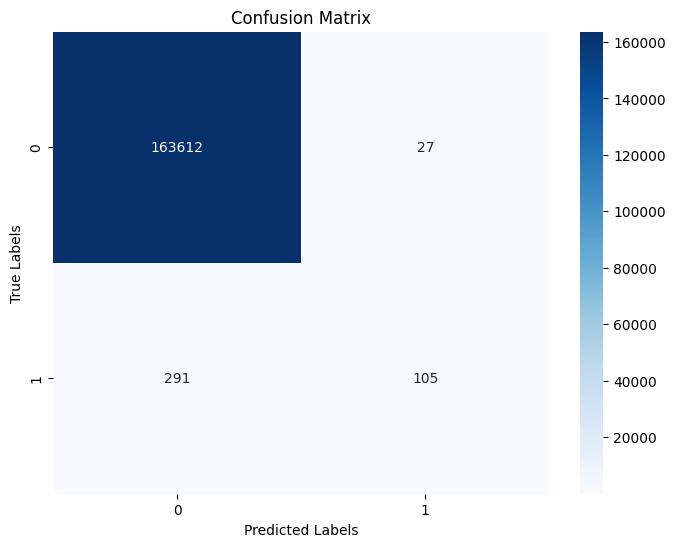

In [30]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()